In [2]:
# Import necessary libraries
import pandas as pd                     # For data manipulation
import seaborn as sns                   # For pairwise visualization
import matplotlib.pyplot as plt         # For plotting
from sklearn.linear_model import LinearRegression  # Linear regression model
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.preprocessing import StandardScaler   # For feature scaling
from sklearn.model_selection import train_test_split  # Train-test split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

# Step 1: Load dataset
data = pd.read_csv('dataset.csv')  # Assumes the file 'dataset.csv' is in the current directory


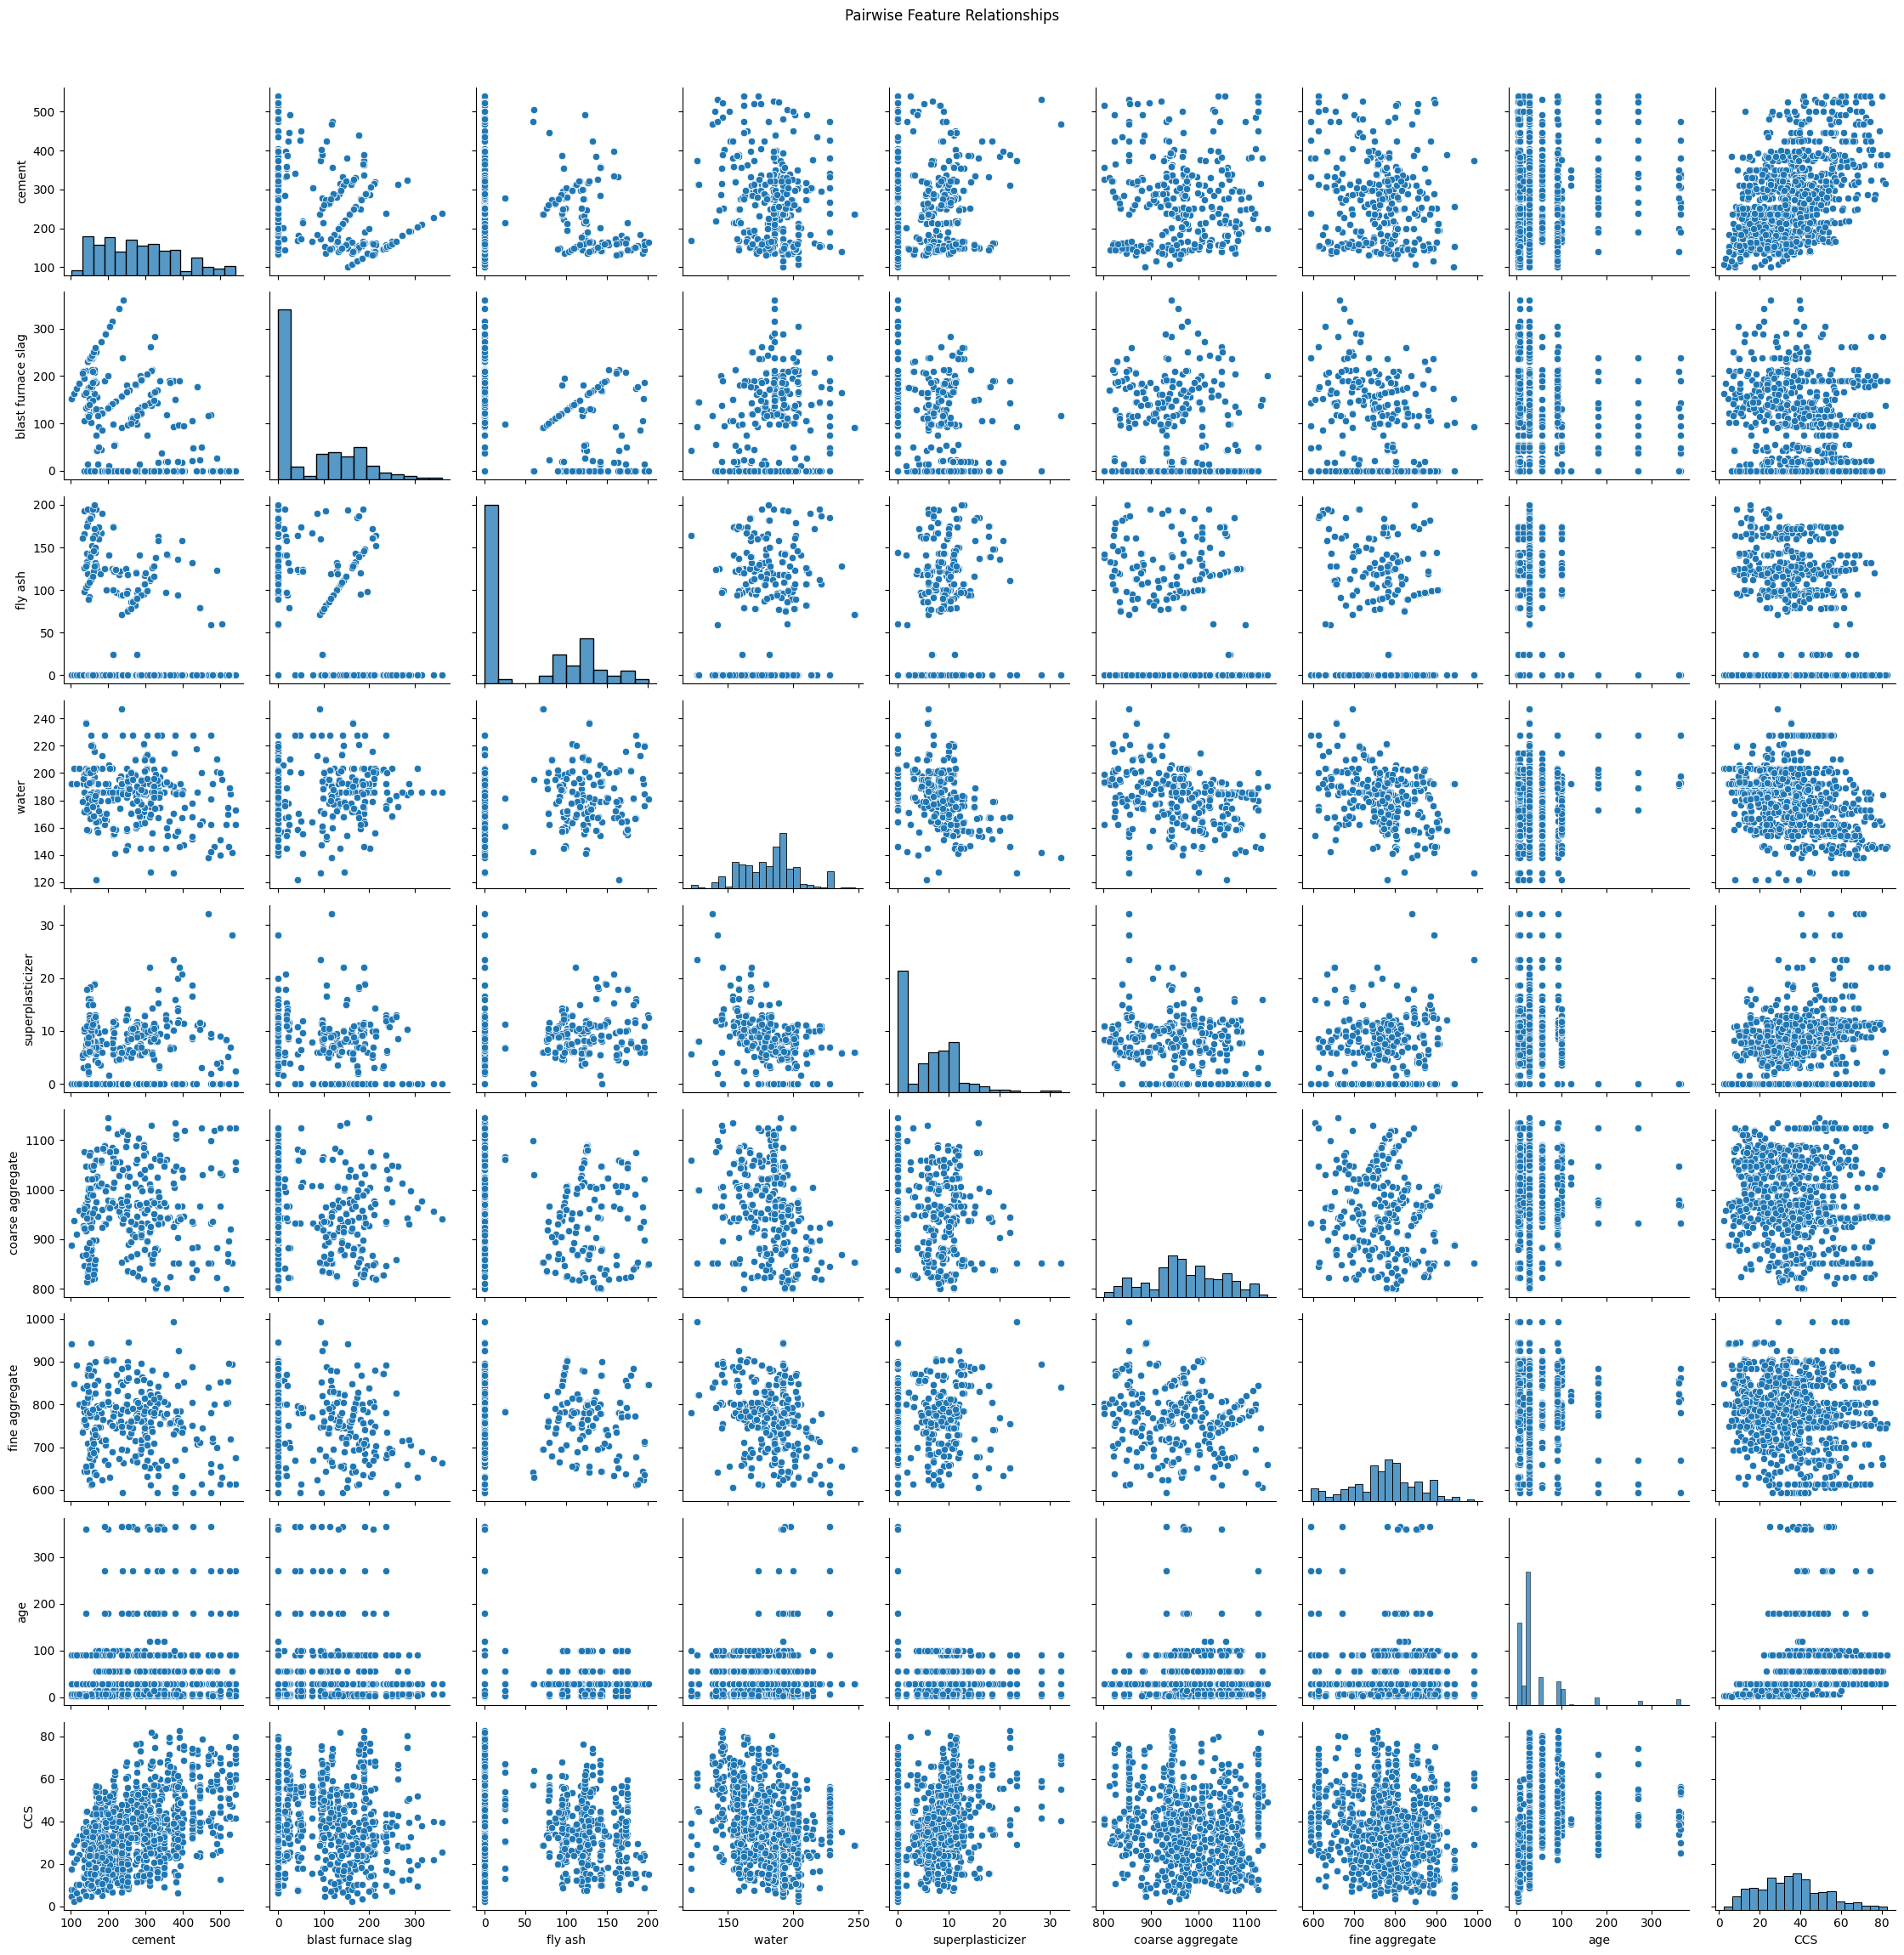

In [3]:
# Step 2: Explore data visually
# This shows scatter plots for each pair of features and the target variable
sns.pairplot(data) # -> 모든 factor의 산점도 그림
plt.suptitle('Pairwise Feature Relationships', y=1.02)
plt.tight_layout()
plt.show()

In [4]:
# Step 3: Separate features and target variable
X = data.drop(columns=['CCS']).values  # Feature matrix: 'CCS' 빼고 모든 column
y = data['CCS'].values                 # Target vector: 'CCS' column


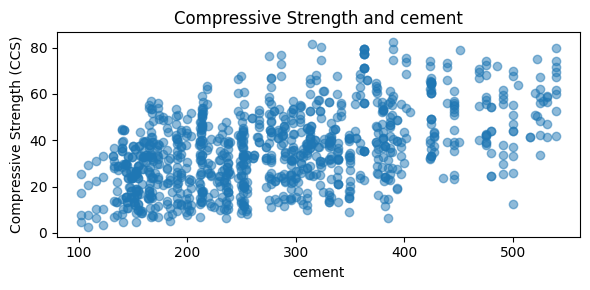

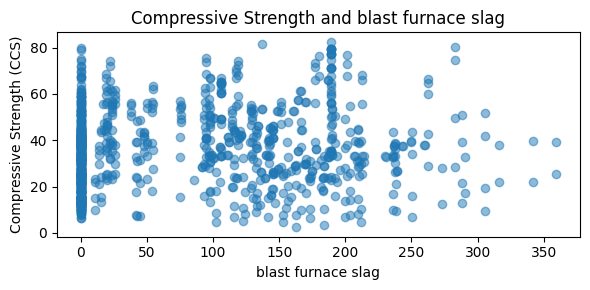

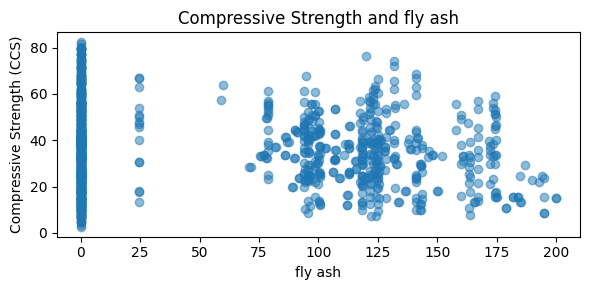

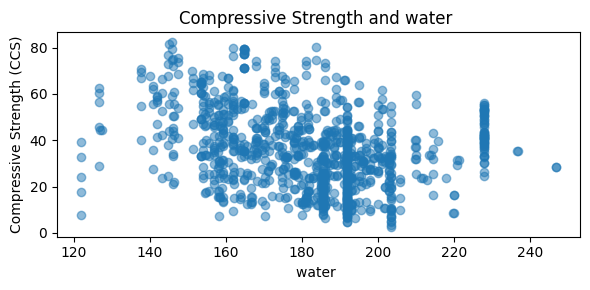

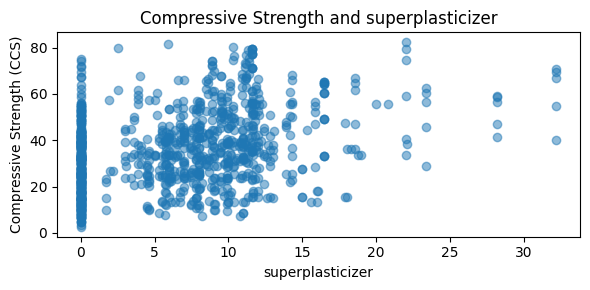

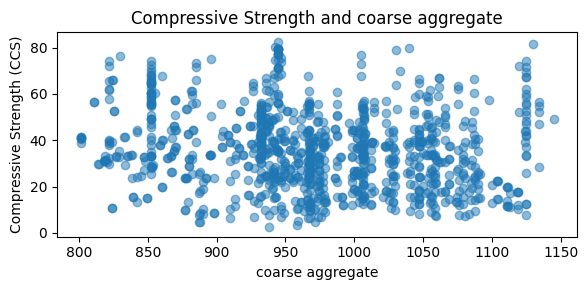

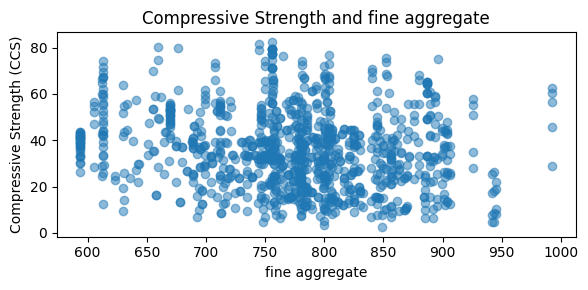

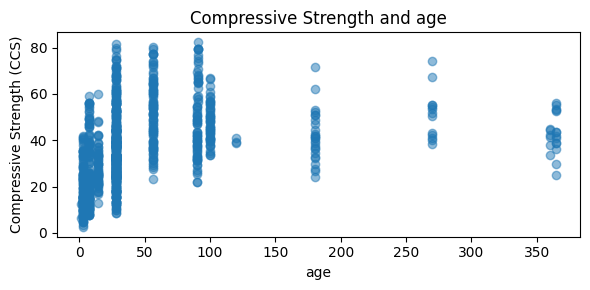

In [5]:
# CCS의 와의 관계만 보는 산점도 그려보기
feature_names = data.drop(columns=['CCS']).columns  # 컬럼명(리스트)

for i, feature in enumerate(feature_names):
    plt.figure(figsize=(6, 3))
    plt.scatter(X[:, i], y, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Compressive Strength (CCS)')
    plt.title(f'Compressive Strength and {feature}')
    plt.tight_layout()
    plt.show()

In [10]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor  # 💡 결정 트리 회귀 모델
from sklearn.metrics import mean_squared_error, r2_score

# Step 4: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Step 5: Standardize features (선택사항이지만 유지)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Create and train Decision Tree regression model
reg_model = DecisionTreeRegressor(random_state=42,max_depth=1000)  # CatBoost 대신 이거!
reg_model.fit(X_train_scaled, y_train)

# Step 7: 예측 및 평가
y_pred = reg_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R² Score:", r2)

MSE: 42.58102330097088
R² Score: 0.8347503240203619


CarBoost는 범주형 데이터에 강한 Gradient Boosting_based Model
Learning rate : 머신러닝 모델(특히 Gradient Boosting 계열 모델)들이 학습할 때 학습 속도를 결정하는 하이퍼파라미터
- 모델이 error를 줄이기 위해 가중치를 업데이트 할 때, 그 크기를 조절하는 비율
Learning rate = 0.1 -> 각 tree가 전체 모델에 10%만 기여
model.fit(X, Y)는 모델이 X(입력)와 Y(정답)를 보고 규칙(예측하는 능력)을 배우게 함 = 모델 학습

In [ ]:
# Step 7: Predict on training and test sets
y_train_pred = reg_model.predict(X_train_scaled) # 결과 예측 함수
y_test_pred = reg_model.predict(X_test_scaled)

# Step 8: Evaluate model
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Train R² Score: {r2_train:.3f}")
print(f"Test R² Score: {r2_test:.3f}")
print(f"Test MSE: {mse_test:.3f}")

# Step 9: Parity plot (Actual vs Predicted)
min_val = min(y.min(), y_train_pred.min(), y_test_pred.min())
max_val = max(y.max(), y_train_pred.max(), y_test_pred.max())
# X, Y 축 범위 지정 -> min과 max로

Train R² Score: 0.993
Test R² Score: 0.938
Test MSE: 15.948


*결정계수(R^2)
= 1- (실제-예측값)^2/(실제-평균)^2
- 1에 가까울수록 완벽한 예측

*MSE (Mean squared Error)
- 예측값과 실제값의 평균 제곱 오차
- 숫자가 작을수록 좋음

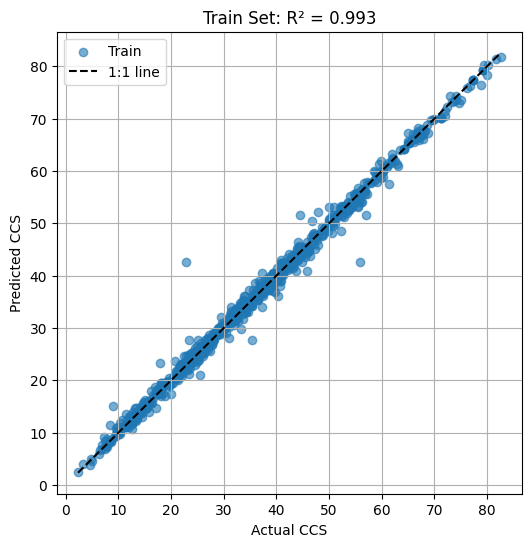

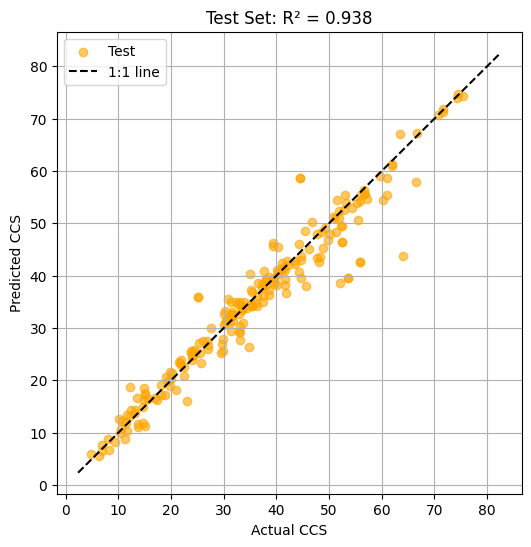

In [ ]:
# Training plot
plt.figure(figsize=(6, 6))
plt.scatter(y_train, y_train_pred, alpha=0.6, label='Train') #산점도
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line') # 45도 대각선 -> 점들이 여기에 몰려있으면 정확한 예측인거임
plt.xlabel('Actual CCS')
plt.ylabel('Predicted CCS')
plt.title(f'Train Set: R² = {r2_train:.3f}')
plt.legend() # 범례 표시
plt.grid(True)
plt.show()

# Test plot -> 일반화 성능이 얼마나 좋은지 눈으로 확인 가능
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='orange', label='Test')
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')
plt.xlabel('Actual CCS')
plt.ylabel('Predicted CCS')
plt.title(f'Test Set: R² = {r2_test:.3f}')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
## Grid Search 해보기 + five-fold CV를 곁들인
# Step 1 : Parameter Grid 정의하기
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [500, 1000, 1500]
}

# Step 2 : Model 정의 
model = CatBoostRegressor(verbose=0, random_state=42) # verbos=0은 train 중 log 안나오게 설정

#  Step 3 : Grid SearchCV 준비
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,                        # 5-Fold cross Validation
    scoring='r2',                # R² 점수를 기준으로 평가 -> R^2 점수가 가장 높은 모델을 찾음
    n_jobs=-1                    # 모든 CPU 코어 사용 (빠르게 처리)
)

# Step 4 : Grid Search 실행하기 (Train)
grid_search.fit(X_train_scaled, y_train)

# Step 5 : 결과 확인하기
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score (CV avg):", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.05, 'n_estimators': 1500}
Best R² Score (CV avg): 0.9367743775021931
